In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
#import excel file
data = pd.read_excel("Sample_data.xlsx")
df=data.copy()

<h4 style="color:red;">Task1 : Some Basic Operations on Data Frame </h4>

- Show first five record of data frame
- Show last five record of data frame
- Show shape of the data frame
- Calculate the sum of null values against each column
- Fill up null values with 0, all nan and ? values
- Convert object columns data type to integer or float


In [3]:
df.head(2)

,Unnamed: 0,Customer ID,U_OB_VC_CNT_T6,U_OB_VC_CC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_CNT_T6,U_OB_DAY_VC_CC_CNT_T6,U_OB_DAY_VC_DUR_T6,U_OB_DAY_VC_REV_T6,...,RECH_750_1000_AMT_T6,RECH_750_1000_CNT_T6,RECH_GT_1000_AMT_T6,RECH_GT_1000_CNT_T6,RECEIVE_AMT_T6,RECEIVE_CNT_T6,SHARE_AMT_T6,SHARE_CNT_T6,LOAN_AMT_T6,LOAN_CNT_T6
0,NaN,1,157,88,379.0,230.070,103,62,207.0,128.794,...,0,0,0,0,0,0,0,0,45,3
1,NaN,2,41,38,132.5,137.276,17,14,65.0,77.824,...,0,0,0,0,25.523,1,0,0,60,4


In [4]:
df.set_index('Customer ID', inplace=True)

In [5]:
df.columns

Index(['Unnamed: 0', 'U_OB_VC_CNT_T6', 'U_OB_VC_CC_CNT_T6', 'U_OB_VC_DUR_T6',
       'U_OB_VC_REV_T6', 'U_OB_DAY_VC_CNT_T6', 'U_OB_DAY_VC_CC_CNT_T6',
       'U_OB_DAY_VC_DUR_T6', 'U_OB_DAY_VC_REV_T6', 'U_OB_EVN_VC_CNT_T6',
       ...
       'RECH_750_1000_AMT_T6', 'RECH_750_1000_CNT_T6', 'RECH_GT_1000_AMT_T6',
       'RECH_GT_1000_CNT_T6', 'RECEIVE_AMT_T6', 'RECEIVE_CNT_T6',
       'SHARE_AMT_T6', 'SHARE_CNT_T6', 'LOAN_AMT_T6', 'LOAN_CNT_T6'],
      dtype='object', length=474)

In [6]:
df.drop('Unnamed: 0',axis = 1, inplace = True)

In [7]:
df.head()

,U_OB_VC_CNT_T6,U_OB_VC_CC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_CNT_T6,U_OB_DAY_VC_CC_CNT_T6,U_OB_DAY_VC_DUR_T6,U_OB_DAY_VC_REV_T6,U_OB_EVN_VC_CNT_T6,U_OB_EVN_VC_CC_CNT_T6,...,RECH_750_1000_AMT_T6,RECH_750_1000_CNT_T6,RECH_GT_1000_AMT_T6,RECH_GT_1000_CNT_T6,RECEIVE_AMT_T6,RECEIVE_CNT_T6,SHARE_AMT_T6,SHARE_CNT_T6,LOAN_AMT_T6,LOAN_CNT_T6
Customer ID,,,,,,,,,,,,,,,,,,,,,
1,157,88,379.0,230.070,103,62,207.0,128.794,51,31,...,0,0,0,0,0,0,0,0,45,3
2,41,38,132.5,137.276,17,14,65.0,77.824,23,23,...,0,0,0,0,25.523,1,0,0,60,4
3,321,185,274.5,98.422,249,150,204.0,49.151,69,44,...,0,0,0,0,0,0,0,0,0,0
4,11,6,172.5,7.587,1,1,2.0,0.149,10,6,...,0,0,0,0,0,0,0,0,0,0
5,313,220,2888.0,52.915,170,131,791.0,29.699,132,100,...,0,0,0,0,0,0,0,0,15,1


In [8]:
df.dtypes

U_OB_VC_CNT_T6                 int64
U_OB_VC_CC_CNT_T6              int64
U_OB_VC_DUR_T6               float64
U_OB_VC_REV_T6               float64
U_OB_DAY_VC_CNT_T6             int64
U_OB_DAY_VC_CC_CNT_T6          int64
U_OB_DAY_VC_DUR_T6           float64
U_OB_DAY_VC_REV_T6           float64
U_OB_EVN_VC_CNT_T6             int64
U_OB_EVN_VC_CC_CNT_T6          int64
U_OB_EVN_VC_DUR_T6           float64
U_OB_EVN_VC_REV_T6           float64
U_OB_NGT_VC_CNT_T6             int64
U_OB_NGT_VC_CC_CNT_T6          int64
U_OB_NGT_VC_DUR_T6           float64
U_OB_NGT_VC_REV_T6           float64
U_OB_PEAK_VC_CNT_T6            int64
U_OB_PEAK_VC_CC_CNT_T6         int64
U_OB_PEAK_VC_DUR_T6          float64
U_OB_PEAK_VC_REV_T6          float64
U_OB_OFFPEAK_VC_CNT_T6         int64
U_OB_OFFPEAK_VC_CC_CNT_T6      int64
U_OB_OFFPEAK_VC_DUR_T6       float64
U_OB_OFFPEAK_VC_REV_T6       float64
U_OB_H_VC_CNT_T6               int64
U_OB_H_VC_CC_CNT_T6            int64
U_OB_H_VC_DUR_T6             float64
U

In [9]:
df.isnull().sum()

U_OB_VC_CNT_T6               0
U_OB_VC_CC_CNT_T6            0
U_OB_VC_DUR_T6               0
U_OB_VC_REV_T6               0
U_OB_DAY_VC_CNT_T6           0
U_OB_DAY_VC_CC_CNT_T6        0
U_OB_DAY_VC_DUR_T6           0
U_OB_DAY_VC_REV_T6           0
U_OB_EVN_VC_CNT_T6           0
U_OB_EVN_VC_CC_CNT_T6        0
U_OB_EVN_VC_DUR_T6           0
U_OB_EVN_VC_REV_T6           0
U_OB_NGT_VC_CNT_T6           0
U_OB_NGT_VC_CC_CNT_T6        0
U_OB_NGT_VC_DUR_T6           0
U_OB_NGT_VC_REV_T6           0
U_OB_PEAK_VC_CNT_T6          0
U_OB_PEAK_VC_CC_CNT_T6       0
U_OB_PEAK_VC_DUR_T6          0
U_OB_PEAK_VC_REV_T6          0
U_OB_OFFPEAK_VC_CNT_T6       0
U_OB_OFFPEAK_VC_CC_CNT_T6    0
U_OB_OFFPEAK_VC_DUR_T6       0
U_OB_OFFPEAK_VC_REV_T6       0
U_OB_H_VC_CNT_T6             0
U_OB_H_VC_CC_CNT_T6          0
U_OB_H_VC_DUR_T6             0
U_OB_H_VC_REV_T6             0
U_OB_W_VC_CNT_T6             0
U_OB_W_VC_CC_CNT_T6          0
                            ..
RECH_VOUCHER_AMT_T6          0
RECH_VOU

In [10]:
df.replace('?',0,inplace=True)

In [11]:
df.dtypes

U_OB_VC_CNT_T6                 int64
U_OB_VC_CC_CNT_T6              int64
U_OB_VC_DUR_T6               float64
U_OB_VC_REV_T6               float64
U_OB_DAY_VC_CNT_T6             int64
U_OB_DAY_VC_CC_CNT_T6          int64
U_OB_DAY_VC_DUR_T6           float64
U_OB_DAY_VC_REV_T6           float64
U_OB_EVN_VC_CNT_T6             int64
U_OB_EVN_VC_CC_CNT_T6          int64
U_OB_EVN_VC_DUR_T6           float64
U_OB_EVN_VC_REV_T6           float64
U_OB_NGT_VC_CNT_T6             int64
U_OB_NGT_VC_CC_CNT_T6          int64
U_OB_NGT_VC_DUR_T6           float64
U_OB_NGT_VC_REV_T6           float64
U_OB_PEAK_VC_CNT_T6            int64
U_OB_PEAK_VC_CC_CNT_T6         int64
U_OB_PEAK_VC_DUR_T6          float64
U_OB_PEAK_VC_REV_T6          float64
U_OB_OFFPEAK_VC_CNT_T6         int64
U_OB_OFFPEAK_VC_CC_CNT_T6      int64
U_OB_OFFPEAK_VC_DUR_T6       float64
U_OB_OFFPEAK_VC_REV_T6       float64
U_OB_H_VC_CNT_T6               int64
U_OB_H_VC_CC_CNT_T6            int64
U_OB_H_VC_DUR_T6             float64
U

In [12]:
df.fillna(0,inplace = True)

### Basic EDA
- Task 2 : Perform Exploratory Data Analysis on Voice Calls 
- Task 3 : Perform Exploratory Data Analysis on SMS 
- Task 4 : Perform Exploratory Data Analysis on GPRS 
- Task 5 : Perform Exploratory Data Analysis on Recharge 

For example look at these
 - Single Value
     - VC Count  (Single Value)
     - VC Revenue (Single Value) <br>
     
 - Comparison Graph
     - VC Day , VC Evening , VC Night 
     - VC Peak ,VC Off Peak

For example look at these
 - Single Value
     - SMS Count 
     - SMS Revenue 
 - Comparison Graph
     - SMS Day ,SMS Evening ,SMS Night 

In [13]:
#Total VC COUNT
data['U_OB_VC_CNT_T6'].sum()

20205

In [14]:
#Total SMS COUNT
data['U_OB_SMS_CNT_T6'].sum()

18587

In [15]:
#Total GPRS COUNT
data['U_GPRS_CNT_T6'].sum()

2104

In [16]:
#Total Recharge COUNT
df['RECH_CNT_T6'].sum()

554

In [17]:
# Call count comparison
call_count_comparison = [data['U_OB_DAY_VC_CNT_T6'].sum(),data['U_OB_EVN_VC_CNT_T6'].sum(),data["U_OB_NGT_VC_CNT_T6"].sum()]
call_count_comparison

[11162, 7355, 1688]

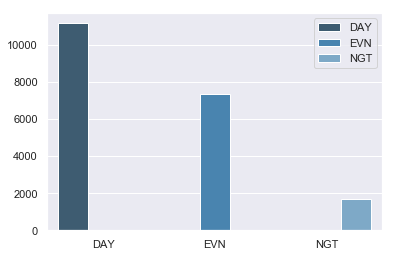

In [18]:
labels=['DAY','EVN','NGT']
sns.barplot(y=call_count_comparison,x=labels ,data=data,hue=labels,color='m',palette="Blues_d")

In [19]:
#Revenue Comparison
revenue = [data['U_OB_VC_REV_T6'].sum(),data['U_OB_SMS_REV_T6'].sum(),data['U_GPRS_REV_T6'].sum()]
revenue

[14011.762000000002, 459.02700000000004, 166.23]

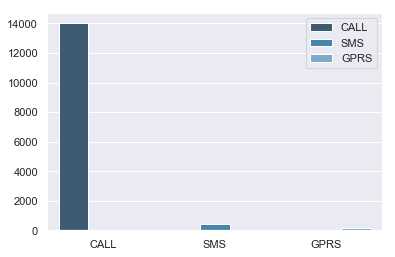

In [22]:
labels=['CALL','SMS','GPRS']
sns.barplot(y=revenue,x=labels ,data=data,hue=labels,color='m',palette="Blues_d")

In [23]:
gprs_comparison = [data['U_GPRS_DAY_VOL_T6'].sum(),data['U_GPRS_EVN_VOL_T6'].sum(),data['U_GPRS_NGT_VOL_T6'].sum()]
gprs_comparison

[9337777, 4475266, 3536520]

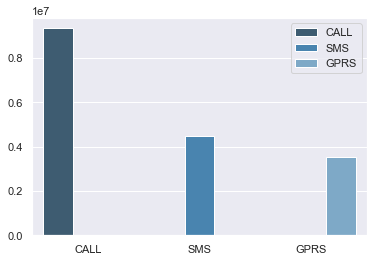

In [24]:
sns.barplot(y=gprs_comparison,x=labels ,data=data,hue=labels,color='m',palette="Blues_d")

<h4 style="color:red;">Task 6 : Removed variables with constant values (0) </h4>   

In [25]:
df = df.loc[:, (df != 0).any(axis=0)]

In [26]:
df.columns

Index(['U_OB_VC_CNT_T6', 'U_OB_VC_CC_CNT_T6', 'U_OB_VC_DUR_T6',
       'U_OB_VC_REV_T6', 'U_OB_DAY_VC_CNT_T6', 'U_OB_DAY_VC_CC_CNT_T6',
       'U_OB_DAY_VC_DUR_T6', 'U_OB_DAY_VC_REV_T6', 'U_OB_EVN_VC_CNT_T6',
       'U_OB_EVN_VC_CC_CNT_T6',
       ...
       'RECH_500_750_AMT_T6', 'RECH_500_750_CNT_T6', 'RECH_GT_1000_AMT_T6',
       'RECH_GT_1000_CNT_T6', 'RECEIVE_AMT_T6', 'RECEIVE_CNT_T6',
       'SHARE_AMT_T6', 'SHARE_CNT_T6', 'LOAN_AMT_T6', 'LOAN_CNT_T6'],
      dtype='object', length=381)

<h4 style="color:red;">Task 7 : Generate Correlation Matrix and Removed collinearity at a cutoff value of 0.9  </h4>

# Feature Selector Library 

- Install Library by following these steps
    - Download library as zip from here: https://github.com/WillKoehrsen/feature-selector
    - Open anaconda prompt
    - The default path will be given in prompt, open window explorer and navigate to that path
    - Copy zip file on that default path
    - pip install feature-selector-master.zip
        - If admin rights error occured try using --user with it
        - If not solved, show error in the course group


- **For help and usage https://github.com/WillKoehrsen/feature-selector/blob/master/Feature%20Selector%20Usage.ipynb**

In [27]:
from feature_selector import FeatureSelector

In [28]:
fs = FeatureSelector(data = df, labels = df.columns)

In [29]:
fs.identify_collinear(correlation_threshold=0.95)

240 features with a correlation magnitude greater than 0.95.



In [30]:
correlated_features = fs.ops['collinear']
correlated_features[:5]

['U_OB_DAY_VC_CNT_T6',
 'U_OB_DAY_VC_CC_CNT_T6',
 'U_OB_DAY_VC_REV_T6',
 'U_OB_EVN_VC_REV_T6',
 'U_OB_NGT_VC_CC_CNT_T6']

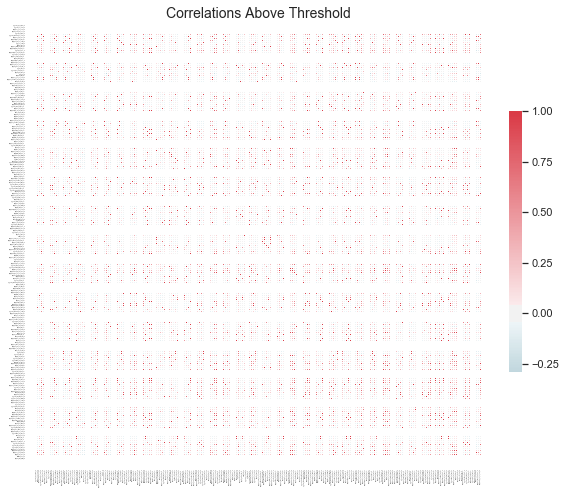

In [31]:
fs.plot_collinear()

In [32]:
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,U_OB_DAY_VC_CNT_T6,U_OB_VC_CNT_T6,0.967055
1,U_OB_DAY_VC_CC_CNT_T6,U_OB_VC_CC_CNT_T6,0.974826
2,U_OB_DAY_VC_CC_CNT_T6,U_OB_DAY_VC_CNT_T6,0.975082
3,U_OB_DAY_VC_REV_T6,U_OB_VC_REV_T6,0.984702
4,U_OB_EVN_VC_REV_T6,U_OB_VC_REV_T6,0.973666


In [33]:
df = fs.remove(methods = ['collinear'])

Removed 240 features.


In [34]:
df.head()

,U_OB_VC_CNT_T6,U_OB_VC_CC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_DUR_T6,U_OB_EVN_VC_CNT_T6,U_OB_EVN_VC_CC_CNT_T6,U_OB_EVN_VC_DUR_T6,U_OB_NGT_VC_CNT_T6,U_OB_NGT_VC_DUR_T6,...,RECH_50_100_AMT_T6,RECH_100_150_AMT_T6,RECH_150_200_AMT_T6,RECH_200_250_AMT_T6,RECH_250_300_AMT_T6,RECH_300_500_AMT_T6,RECH_GT_1000_AMT_T6,RECEIVE_AMT_T6,SHARE_AMT_T6,LOAN_AMT_T6
Customer ID,,,,,,,,,,,,,,,,,,,,,
1,157,88,379.0,230.070,207.0,51,31,169.0,3,3.0,...,0,600,0,0,0,0,0,0.000,0.0,45
2,41,38,132.5,137.276,65.0,23,23,66.5,1,1.0,...,0,400,0,0,0,0,0,25.523,0.0,60
3,321,185,274.5,98.422,204.0,69,44,69.0,3,1.5,...,0,800,0,0,0,0,0,0.000,0.0,0
4,11,6,172.5,7.587,2.0,10,6,170.5,0,0.0,...,0,0,0,0,0,0,0,0.000,0.0,0
5,313,220,2888.0,52.915,791.0,132,100,2002.0,11,95.0,...,0,600,0,0,0,0,0,0.000,0.0,15


In [35]:
df.shape

(100, 141)

In [36]:
len(df.columns)

141

In [37]:
len([col for col in df.columns if not df[col].is_unique])

141

In [38]:
df_preprocessed  = df.copy()

<h4 style="color:red;">Task 8 : Standardized Min Max Normalization (0-1)  </h4> 

In [39]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
new=scaler.fit_transform(df_preprocessed) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [42]:
scaled=pd.DataFrame(columns=df_preprocessed.columns,data=new) #convert the scaled values into the dataframe

In [43]:
scaled.head()

,U_OB_VC_CNT_T6,U_OB_VC_CC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_DUR_T6,U_OB_EVN_VC_CNT_T6,U_OB_EVN_VC_CC_CNT_T6,U_OB_EVN_VC_DUR_T6,U_OB_NGT_VC_CNT_T6,U_OB_NGT_VC_DUR_T6,...,RECH_50_100_AMT_T6,RECH_100_150_AMT_T6,RECH_150_200_AMT_T6,RECH_200_250_AMT_T6,RECH_250_300_AMT_T6,RECH_300_500_AMT_T6,RECH_GT_1000_AMT_T6,RECEIVE_AMT_T6,SHARE_AMT_T6,LOAN_AMT_T6
0,0.164369,0.218045,0.069944,0.089500,0.093907,0.163987,0.179191,0.084416,0.022727,0.004093,...,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.200000
1,0.041357,0.092732,0.007476,0.053402,0.028859,0.073955,0.132948,0.033217,0.007576,0.001364,...,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.437138,0.0,0.266667
2,0.338282,0.461153,0.043462,0.038287,0.092533,0.221865,0.254335,0.034466,0.022727,0.002046,...,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
3,0.009544,0.012531,0.017613,0.002951,0.000000,0.032154,0.034682,0.085165,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.329799,0.548872,0.705778,0.020585,0.361429,0.424437,0.578035,1.000000,0.083333,0.129604,...,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.066667


In [44]:
preprocessed_columns = list(df_preprocessed.columns)

<h4 style="color:red;">Task 9 : Perform Kmean Clustering with any K value  </h4> 

In [45]:
kmean = KMeans(n_clusters=3, random_state=0)
kmean.fit(scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [46]:
df_preprocessed['kmean'] = kmean.labels_
df_preprocessed['kmean'].value_counts()

2    63
0    19
1    18
Name: kmean, dtype: int64

**Calculate Silhouette Score**

In [47]:
from sklearn import metrics

In [48]:
metrics.silhouette_score(scaled, kmean.labels_)

0.20986676416705802

<h4 style="color:red;">Task 10 : Perform Elbow Analysis  </h4> 

In [49]:
from scipy.spatial.distance import cdist

In [50]:
cost = []

K = range(1,16)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(scaled)
    cost.append(sum(np.min(cdist(scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / scaled.shape[0])

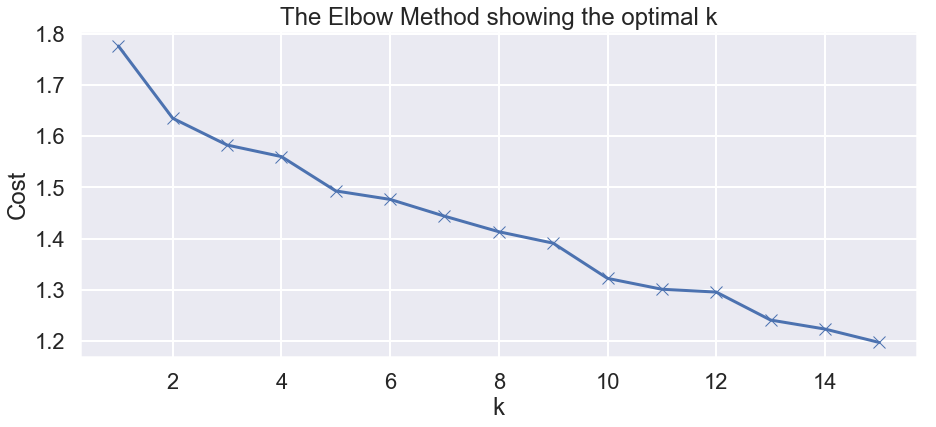

In [51]:
plt.figure(figsize=(15,6))
sns.set_context('poster')
plt.plot(K, cost, 'bx-')
plt.xlabel('k')
plt.ylabel('Cost')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**Compare Silhouette Score with k = 3, 4 and 5**

In [52]:
kmean = KMeans(n_clusters=3, random_state=0)
kmean.fit(scaled)
df_preprocessed['kmeanclus3'] = kmean.labels_
df_preprocessed['kmeanclus3'].value_counts()

2    63
0    19
1    18
Name: kmeanclus3, dtype: int64

In [53]:
metrics.silhouette_score(scaled, kmean.labels_)

0.20986676416705802

In [54]:
kmean = KMeans(n_clusters=4, random_state=0)
kmean.fit(scaled)
df_preprocessed['kmeanclus4'] = kmean.labels_
df_preprocessed['kmeanclus4'].value_counts()

3    46
2    20
1    18
0    16
Name: kmeanclus4, dtype: int64

In [55]:
metrics.silhouette_score(scaled, kmean.labels_)

0.041041800695645766

In [56]:
kmean = KMeans(n_clusters=5, random_state=0)
kmean.fit(scaled)
df_preprocessed['kmeanclus5'] = kmean.labels_
df_preprocessed['kmeanclus5'].value_counts()

3    49
2    26
1    18
4     4
0     3
Name: kmeanclus5, dtype: int64

In [57]:
metrics.silhouette_score(scaled, kmean.labels_)

0.04216009679434813

In [58]:
kmean = KMeans(n_clusters=6, random_state=0)
kmean.fit(scaled)
df_preprocessed['kmeanclus6'] = kmean.labels_
df_preprocessed['kmeanclus6'].value_counts()

1    31
4    19
3    18
5    14
2    12
0     6
Name: kmeanclus6, dtype: int64

In [59]:
metrics.silhouette_score(scaled, kmean.labels_)

0.046543795135507084

<h4 style="color:red;">Task 12 : Do profiling with clusters and make radar plot only on GPRS, CALL, SMS, RECHARGE </h4> 

**For this task make variable 'outbound' and extract all columns name in which 'OB' appears**

In [60]:
outbound = [col for col in df.columns if 'OB' in col]

**For this task make variable 'outbound' and extract all columns name in which 'OB' appears**

In [61]:
inbound = [col for col in df.columns if 'IB' in col]

**For this task make variable 'gprs' and extract all columns name in which 'GPRS' appears**

In [62]:
gprs = [col for col in df.columns if 'GPRS' in col]

In [63]:
scaled['kmean'] = df_preprocessed['kmean']

**Group on cluster and then mean on all the columns**

In [64]:
profiled = scaled.groupby('kmean').mean().reset_index()
profiled.head()

,kmean,U_OB_VC_CNT_T6,U_OB_VC_CC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_DUR_T6,U_OB_EVN_VC_CNT_T6,U_OB_EVN_VC_CC_CNT_T6,U_OB_EVN_VC_DUR_T6,U_OB_NGT_VC_CNT_T6,...,RECH_50_100_AMT_T6,RECH_100_150_AMT_T6,RECH_150_200_AMT_T6,RECH_200_250_AMT_T6,RECH_250_300_AMT_T6,RECH_300_500_AMT_T6,RECH_GT_1000_AMT_T6,RECEIVE_AMT_T6,SHARE_AMT_T6,LOAN_AMT_T6
0,0.0,0.189172,0.282790,0.071521,0.043109,0.095053,0.183994,0.254014,0.077769,0.104377,...,0.101587,0.129630,0.114871,0.018519,0.000000,0.000000,0.085997,0.000000,0.000000,0.111111
1,1.0,0.304171,0.399192,0.254688,0.041268,0.230722,0.348339,0.422286,0.233447,0.192761,...,0.192460,0.191667,0.012531,0.000000,0.000000,0.064815,0.000000,0.000000,0.000000,0.233333
2,2.0,0.193169,0.242591,0.142358,0.060991,0.144424,0.220691,0.246720,0.152887,0.117725,...,0.153311,0.144312,0.028166,0.029101,0.015873,0.036508,0.000000,0.028753,0.015873,0.234921


In [65]:
import plotly
plotly.tools.set_credentials_file(username='salman1127', api_key='KJQqdaXV8CFO3QLEQqhE7K')

In [66]:
import plotly.plotly as py
import plotly.graph_objs as go

**Make Rador Plot for all columns of calls**

In [67]:
radar_data = [
    go.Scatterpolar(
      r = list(profiled.loc[0,outbound]),
      theta = outbound,
      fill = 'tonext',
      fillcolor=None,
      name = 'Cluster 0'
    ),
    go.Scatterpolar(
      r = list(profiled.loc[1,outbound]),
      theta = outbound,
      fill = 'tonext',
      fillcolor=None,
      name = 'Cluster 1'
    ),
    go.Scatterpolar(
      r = list(profiled.loc[2,outbound]),
      theta = outbound,
      fill = 'tonext',
      fillcolor=None,
      name = 'Cluster 2'
    )
]

In [68]:
radar_layout = go.Layout(polar = dict(radialaxis = dict(visible = True,range = [0, 1])), showlegend = True)

In [69]:
fig = go.Figure(data=radar_data, layout=radar_layout)
py.iplot(fig, filename = "radar1")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



**Make Rador Plot for inbound calls**

In [70]:
radar_data = [
    go.Scatterpolar(
      r = list(profiled.loc[0,inbound]),
      theta = inbound,
      fill = 'tonext',
      fillcolor=None,
      name = 'Cluster 0'
    ),
    go.Scatterpolar(
      r = list(profiled.loc[1,inbound]),
      theta = inbound,
      fill = 'tonext',
      fillcolor=None,
      name = 'Cluster 1'
    ),
    go.Scatterpolar(
      r = list(profiled.loc[2,inbound]),
      theta = inbound,
      fill = 'tonext',
      fillcolor=None,
      name = 'Cluster 2'
    )
]
radar_layout = go.Layout(polar = dict(radialaxis = dict(visible = True,range = [0, 1])), showlegend = True)
fig = go.Figure(data=radar_data, layout=radar_layout)
py.iplot(fig, filename = "radar1")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



**Make Rador Plot for gprs**

In [71]:
radar_data = [
    go.Scatterpolar(
      r = list(profiled.loc[0,gprs]),
      theta = gprs,
      fill = 'tonext',
      fillcolor=None,
      name = 'Cluster 0'
    ),
    go.Scatterpolar(
      r = list(profiled.loc[1,gprs]),
      theta = gprs,
      fill = 'tonext',
      fillcolor=None,
      name = 'Cluster 1'
    ),
    go.Scatterpolar(
      r = list(profiled.loc[2,gprs]),
      theta = gprs,
      fill = 'tonext',
      fillcolor=None,
      name = 'Cluster 2'
    )
]
radar_layout = go.Layout(polar = dict(radialaxis = dict(visible = True,range = [0, .5])), showlegend = True)
fig = go.Figure(data=radar_data, layout=radar_layout)
py.iplot(fig, filename = "radar1")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



.